# Pymaceuticals Inc.
---
##Analysis and Observations
#One of the strongest inferences we can pull from this analysis is the strong #correlation between a mouses' weight and the tumor volume. As the mouse #increases in weight, so does the tumor volume. this is shown in a nearly perfect correlation coefficient of 0.84 out of 1.

#In analyizing one drug, Capomulin, we discover that over time with one mouse we are able to see the tumor volume decrease over time. replicating this across more mice, we may be able to see consistency with drugs decreasing tumor size over time. This could also be replicated for each drug and a sample size of mice.

#Capomulin and Ramicane may be the most effective drugs within the study. This is seen in the summary stats portion. Both of these drugs have similar median and means when it comes to tumor volume. At close to 10 points lower than the other drugs, these may be the most effective. 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df=mouse_metadata.merge(study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combined_df[combined_df.duplicated(subset=["Mouse ID" , "Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df[combined_df["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_dfclean=combined_df[combined_df["Mouse ID"]!="g989"]
combined_dfclean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
combined_dfclean["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_mean = combined_dfclean.groupby(["Drug Regimen"]).mean(numeric_only=True)["Tumor Volume (mm3)"]
tumor_median = combined_dfclean.groupby(["Drug Regimen"]).median(numeric_only=True)["Tumor Volume (mm3)"]
tumor_var = combined_dfclean.groupby(["Drug Regimen"]).var(numeric_only=True)["Tumor Volume (mm3)"]
tumor_std = combined_dfclean.groupby(["Drug Regimen"]).std(numeric_only=True)["Tumor Volume (mm3)"]
tumor_sem = combined_dfclean.groupby(["Drug Regimen"]).sem(numeric_only=True)["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({
                "Mean Tumor Volume":tumor_mean,
                "Median Tumor Volume":tumor_median,
                "Variance Tumor Volume": tumor_var,
                "STDV Tumor Volume":tumor_std,
                "SEM Tumor Volume": tumor_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,STDV Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_aggr = combined_df.groupby(["Drug Regimen"]).aggregate(func =["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
tumor_aggr

C:\Users\ellio\AppData\Local\Temp\ipykernel_13008\193688243.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tumor_aggr = combined_df.groupby(["Drug Regimen"]).aggregate(func =["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

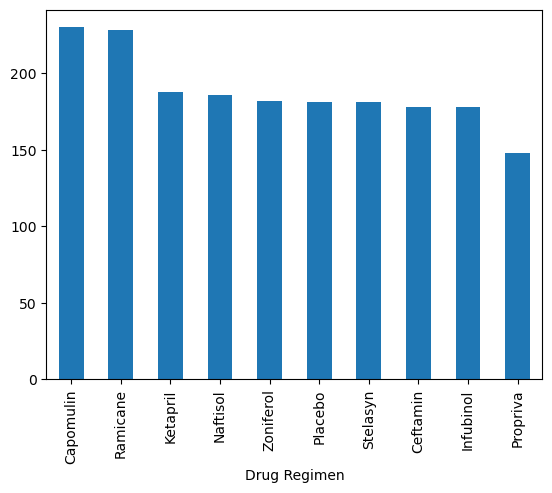

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
mouse_time_by_drug = combined_dfclean.groupby(["Drug Regimen"]).size().sort_values(ascending = False)
mouse_time_by_drug.plot.bar()

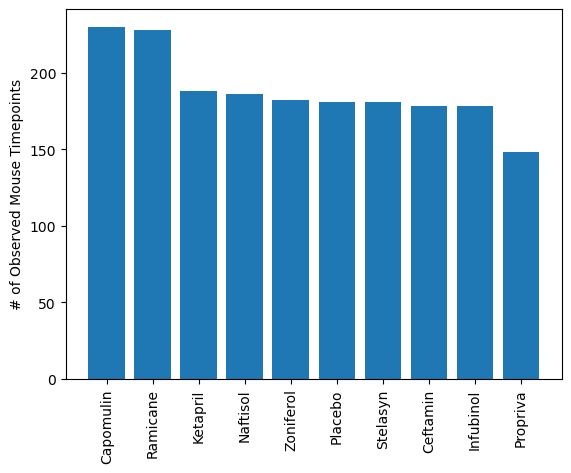

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(mouse_time_by_drug.index, mouse_time_by_drug.values)
plt.xticks(mouse_time_by_drug.index, labels = mouse_time_by_drug.index , rotation='vertical')
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='Sex'>

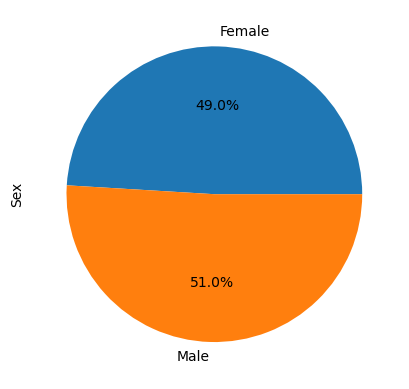

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_per = combined_dfclean.groupby(["Sex"]).count()["Mouse ID"]
sex_per.plot.pie(autopct='%1.1f%%', ylabel="Sex")

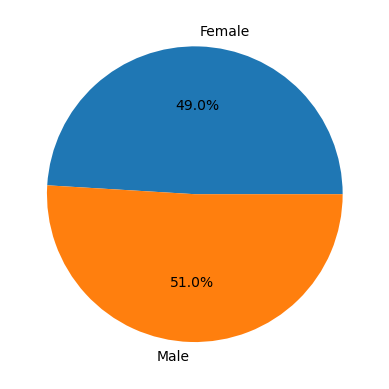

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_per.values, labels = sex_per.index, autopct='%1.1f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_by_drug = combined_dfclean[combined_dfclean["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
#tumor_by_drug
# Start by getting the last (greatest) timepoint for each mouse
max_time = tumor_by_drug[["Timepoint", "Mouse ID"]].groupby("Mouse ID").max()
#max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_tumor = max_time.merge(tumor_by_drug, left_on=["Timepoint", "Mouse ID"], right_on=["Timepoint", "Mouse ID"])
merged_tumor.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a275,Ceftamin,Female,20,28,62.999356,3
3,45,a411,Ramicane,Male,3,22,38.407618,1
4,45,a444,Ramicane,Female,10,25,43.047543,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# for treatment in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#df.boxplot()

## Line and Scatter Plots

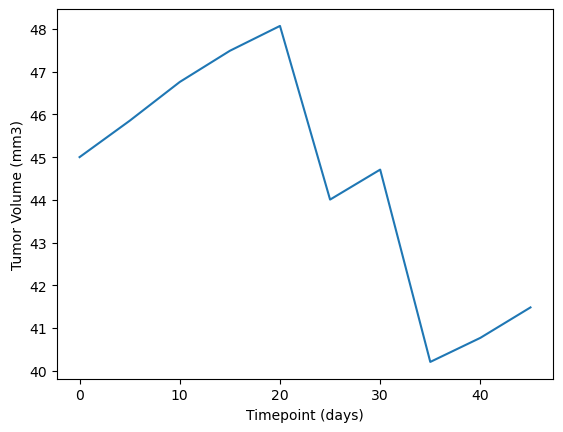

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_l509 = combined_dfclean[combined_dfclean["Mouse ID"]=="l509"]
plt.plot(df_l509["Timepoint"],df_l509["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

C:\Users\ellio\AppData\Local\Temp\ipykernel_13008\3389943686.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_by_tumor = combined_dfclean[combined_dfclean["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]


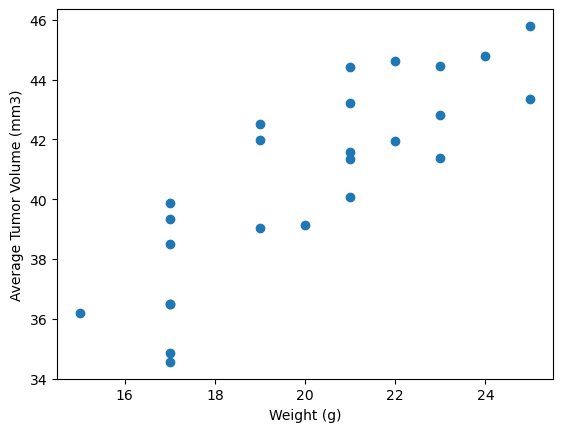

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_by_tumor = combined_dfclean[combined_dfclean["Drug Regimen"]=="Capomulin"].groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]
plt.scatter(weight_by_tumor["Weight (g)"], weight_by_tumor["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [36]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
weight_by_tumor.corr()
res = st.linregress(weight_by_tumor["Weight (g)"], weight_by_tumor["Tumor Volume (mm3)"])
res.rvalue

0.8419363424694721

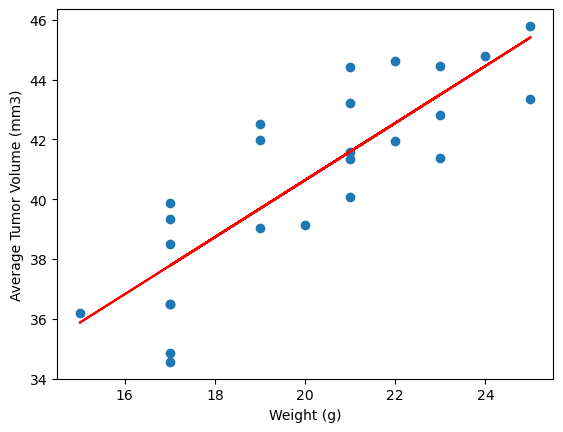

In [34]:
plt.scatter(weight_by_tumor["Weight (g)"], weight_by_tumor["Tumor Volume (mm3)"])
plt.plot(weight_by_tumor["Weight (g)"], res.intercept + res.slope*weight_by_tumor["Weight (g)"], 'r')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()